<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sandford+-2020,-Section-2:--Information-Content-of-Spectra" data-toc-modified-id="Sandford+-2020,-Section-2:--Information-Content-of-Spectra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sandford+ 2020, Section 2: <br> Information Content of Spectra</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plotting-Configs" data-toc-modified-id="Plotting-Configs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting Configs</a></span></li><li><span><a href="#Figure-1:-D1200G-Gradients" data-toc-modified-id="Figure-1:-D1200G-Gradients-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Figure 1: D1200G Gradients</a></span><ul class="toc-item"><li><span><a href="#Calculate-Gradients" data-toc-modified-id="Calculate-Gradients-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Calculate Gradients</a></span></li><li><span><a href="#Plot-Gradients" data-toc-modified-id="Plot-Gradients-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Plot Gradients</a></span></li></ul></li></ul></li></ul></div>

# Sandford+ 2020, Section 2: <br> Information Content of Spectra
## Imports 


In [1]:
import numpy as np

from chemicalc import instruments as inst
from chemicalc import reference_spectra as ref
from chemicalc.plot import plot_gradients

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Plotting Configs


In [2]:
output_dir = './figures/'

mpl.rc('axes', grid=True, lw=2)
mpl.rc('ytick', direction='in', labelsize=18)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('xtick', direction='in', labelsize=18)
mpl.rc('xtick.major', size=5, width=1)
mpl.rc('ytick', direction='in', labelsize=18)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('grid', alpha=0.75, lw=1)
mpl.rc('figure', dpi=300)

## Figure 1: D1200G Gradients
### Calculate Gradients


In [3]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Insturment Resolution
RGB.convolve(d1200g)

# Calculate Gradient Spectra
RGB.calc_gradient(d1200g)


### Plot Gradients


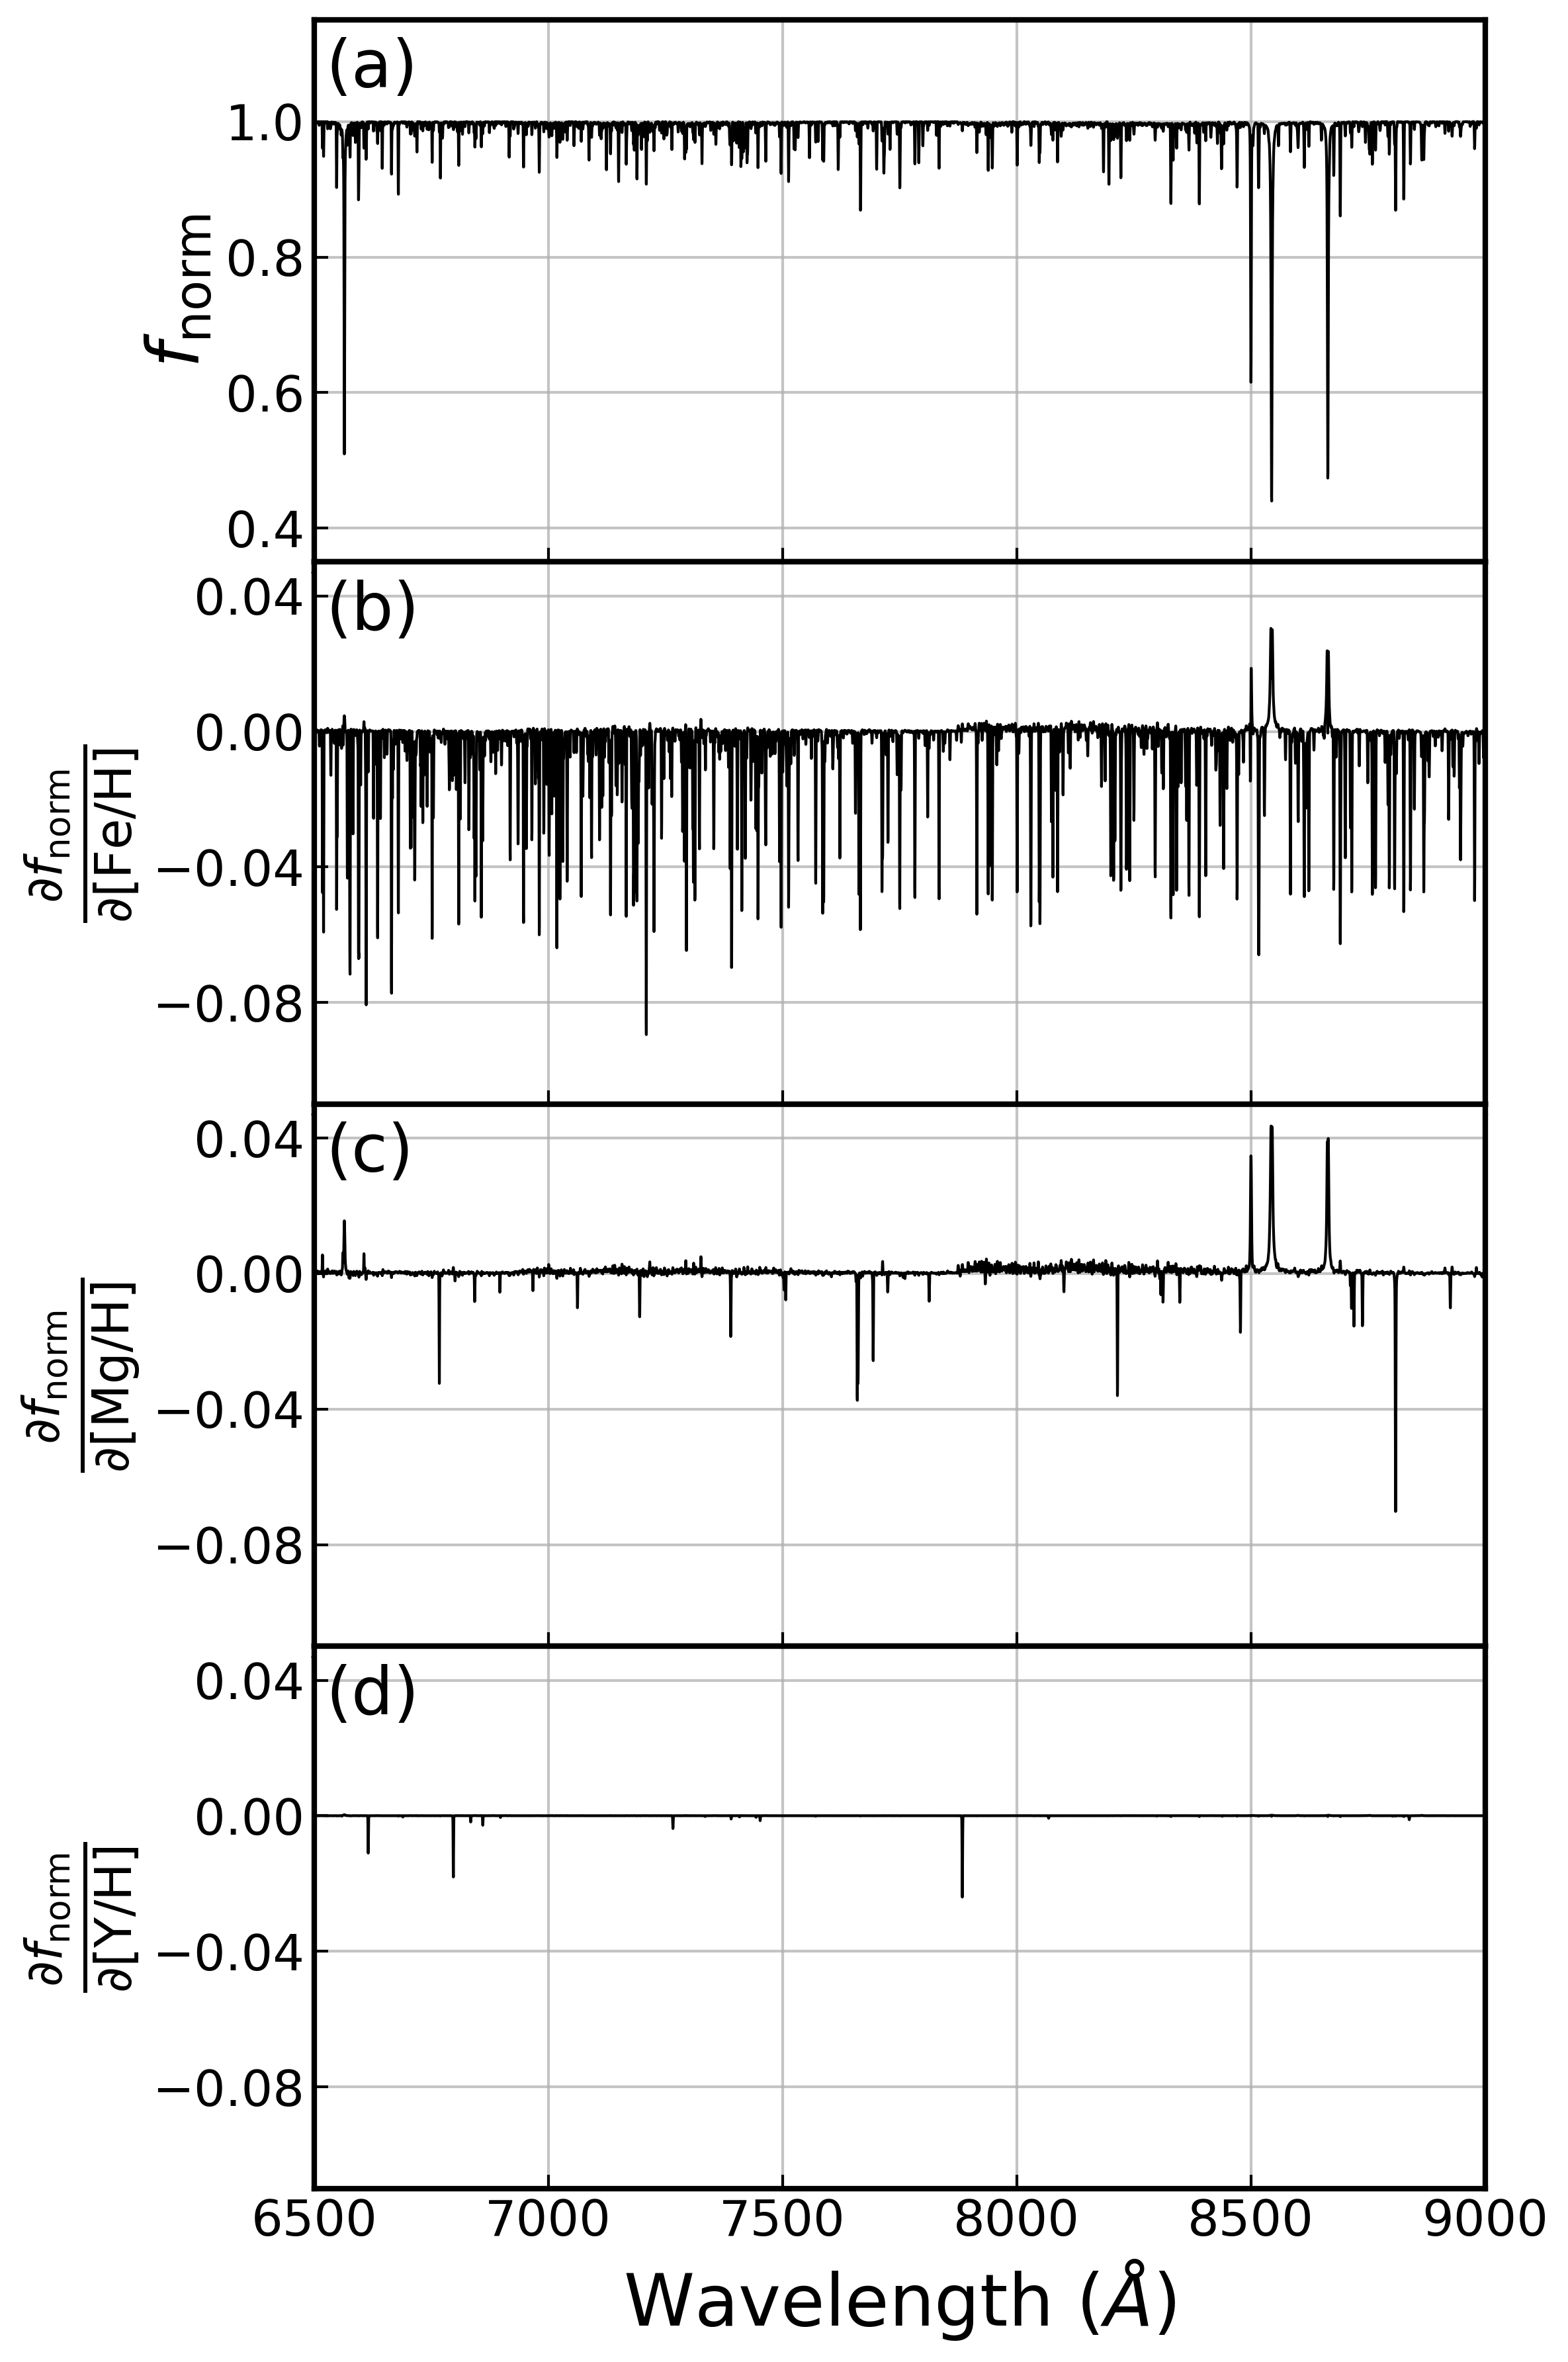

In [4]:
fig = plot_gradients(RGB, 'DEIMOS 1200G', ['Fe', 'Mg', 'Y'],
                     ylim=(-0.11, 0.05), ylim_spec=(0.35, 1.15),
                     yticks=[-0.08, -0.04, 0.0, 0.04],
                     yticks_spec=[0.4, 0.6, 0.8, 1.0],
                     include_spec=True)
# Annotate Panels
fig.axes[0].text(6525, 1.05, '(a)', size=24)
fig.axes[1].text(6525, 0.03, '(b)', size=24)
fig.axes[2].text(6525, 0.03, '(c)', size=24)
fig.axes[3].text(6525, 0.03, '(d)', size=24)
fig.savefig(output_dir+'gradients.png')